### Import Dependencies

In [7]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Importing functions from the modules in the qseg package
from qseg.graph_utils import image_to_grid_graph, draw, draw_graph_cut_edges
from qseg.dwave_utils import dwave_solver, annealer_solver
from qseg.utils import decode_binary_string

# Additional necessary imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from qiskit_optimization.applications import Maxcut
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite


### Create a sample Image

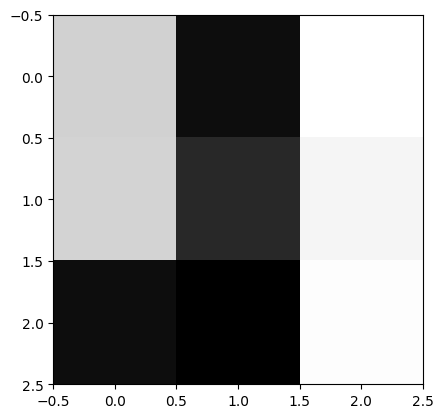

In [119]:
height,width = 3,3

image = np.array([
       [0.82,  0.1, 0.99],
       [0.83,  0.2, 0.95],
       [0.1,  0.05, 0.98]
       ])
plt.imshow(image, cmap=plt.cm.gray)

### Convert Image to Graph

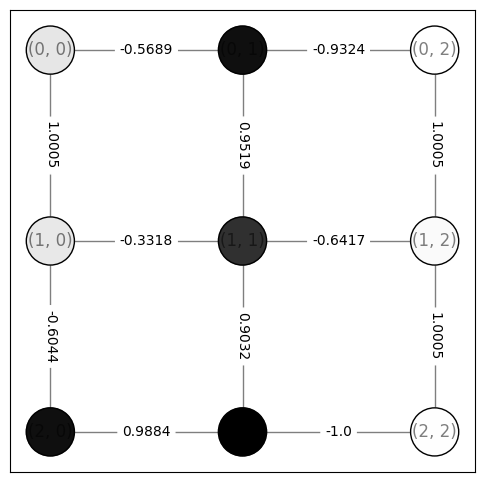

In [121]:
normalized_nx_elist = image_to_grid_graph(image)  # We are using Guassian similarity metric as the edge weight metric
G = nx.grid_2d_graph(image.shape[0], image.shape[1])
G.add_weighted_edges_from(normalized_nx_elist)
draw(G, image)

### Solve using D-Wave annealer

In [134]:
start_time = time.time()
samples_dataframe, execution_info_dict = annealer_solver(G, private_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
total_time = time.time()-start_time
execution_info_dict['total_time'] = total_time
execution_info_dict

{'qpu_sampling_time': 222800.0,
 'qpu_anneal_time_per_sample': 20.0,
 'qpu_readout_time_per_sample': 70.86,
 'qpu_access_time': 238725.57,
 'qpu_access_overhead_time': 1191.43,
 'qpu_programming_time': 15925.57,
 'qpu_delay_time_per_sample': 20.54,
 'total_post_processing_time': 337.0,
 'post_processing_overhead_time': 337.0,
 'problem_formulation_time': 0.01840686798095703,
 'connection_time': 4.283363103866577,
 'embedding_time': 0.14559245109558105,
 'response_time': 0.08754682540893555,
 'sample_fetch_time': 0.0025017261505126953,
 'total_time': 6.373000144958496}

### All samples received

In [136]:
samples_dataframe

,0,1,2,3,4,5,6,7,8,chain_break_fraction,energy,num_occurrences
0,0,1,0,0,1,0,1,1,0,0.0,-4.0870,998
1,1,0,1,1,0,1,0,0,1,0.0,-4.0830,998
2,0,1,0,0,1,0,0,1,0,0.0,-2.4902,1
3,0,1,1,0,1,0,1,1,0,0.0,-2.1522,1
4,1,0,0,1,0,1,0,0,1,0.0,-2.1520,2


### Decode binary solution string to a binary segmentation mask

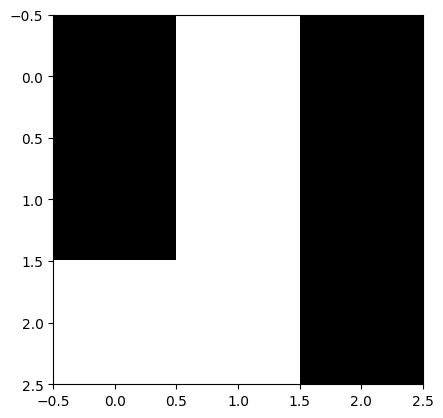

In [138]:
solution_binary_string = samples_dataframe.iloc[0][:-3]
segmentation_mask = decode_binary_string(solution_binary_string, height, width)
plt.imshow(segmentation_mask, cmap=plt.cm.gray)

In [140]:
cut_edges = [(u, v) for (u, v, d) in G.edges(data=True) if segmentation_mask[u]!=segmentation_mask[v]]
cut_edges

[((0, 0), (0, 1)),
 ((0, 1), (0, 2)),
 ((1, 0), (2, 0)),
 ((1, 0), (1, 1)),
 ((1, 1), (1, 2)),
 ((2, 1), (2, 2))]

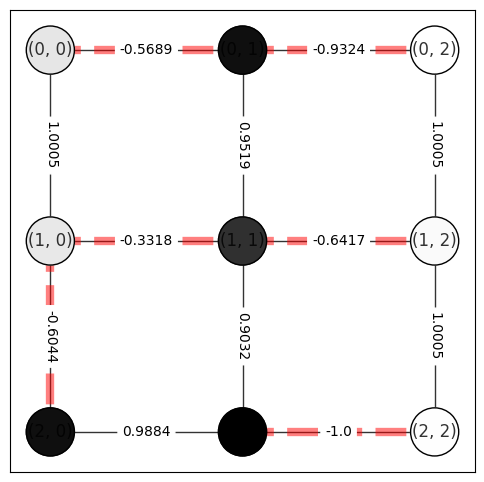

In [142]:
draw_graph_cut_edges(G, image, cut_edges)